CSV파일을 읽고 파티셔닝하기

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

#데이터 읽기
df_adv = pd.read_csv('data/7/adv.csv', index_col=0)
print(df_adv.shape)

(200, 4)


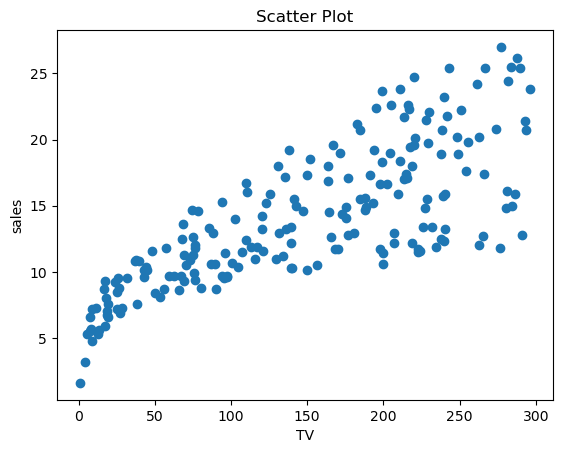

In [3]:
plt.scatter(df_adv.TV, df_adv.sales)
plt.title('Scatter Plot')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

In [4]:
#파티셔닝하기
X = df_adv.loc[:,['TV']]
Y = df_adv['sales']
print(X.shape)

(200, 1)


In [5]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state=42)

선형 회귀모델 만들기

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
regr.score(X_train, Y_train)

0.5736021199591975

In [7]:
regr.coef_

array([0.0464078])

X_test로 예측값 계산, MSE(Mean Square Error)구하기

In [9]:
Y_pred = regr.predict(X_test)
np.mean((Y_pred - Y_test)**2)

8.970991242413614

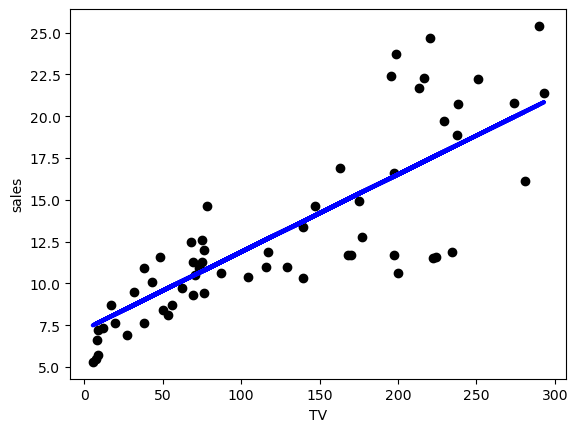

In [11]:
plt.scatter(X_test, Y_test, color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

로지스틱 회귀모형 피팅하기

In [13]:
df_credit = pd.read_csv('data/7/creditset.csv', index_col=0)
print(df_credit.shape)

(2000, 5)


In [15]:
X = df_credit.loc[:, ['income', 'age', 'loan']]
Y = df_credit['default10yr']
print(X.shape)

(2000, 3)


In [16]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [17]:
model = linear_model.LogisticRegression()
model.fit(X, Y)
model.coef_

array([[-5.75841286e-05, -1.35659170e-01,  8.97486186e-04]])

Test 데이터로 accrucy 구하기

In [18]:
Y_pred = model.predict(X_test)
Y_pred2 = [0 if x<0.5 else 1 for x in Y_pred]
Y_pred3 = Y_pred2 == Y_test
np.mean(Y_pred3 == Y_test)

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, Y_pred3)

array([[ 12, 496],
       [ 43,  49]], dtype=int64)

In [20]:
classification_report(Y_test, Y_pred3)

'              precision    recall  f1-score   support\n\n           0       0.22      0.02      0.04       508\n           1       0.09      0.53      0.15        92\n\n    accuracy                           0.10       600\n   macro avg       0.15      0.28      0.10       600\nweighted avg       0.20      0.10      0.06       600\n'